In [62]:
import pandas as pd 
import numpy as np 
df=pd.read_csv("E:\PYTHON\RNN\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.shape

(150, 6)

In [64]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [67]:
numeric_cols=df.select_dtypes(include=['float64','int64'])
skew_values=numeric_cols.skew()
print(skew_values)

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


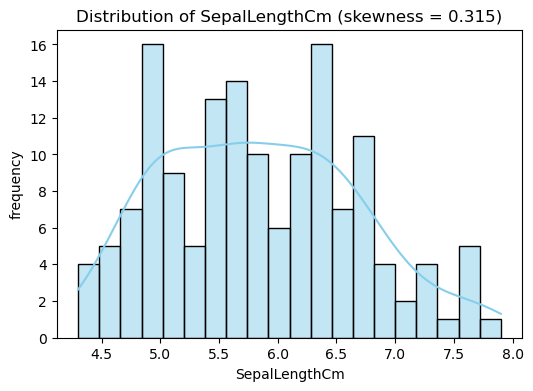

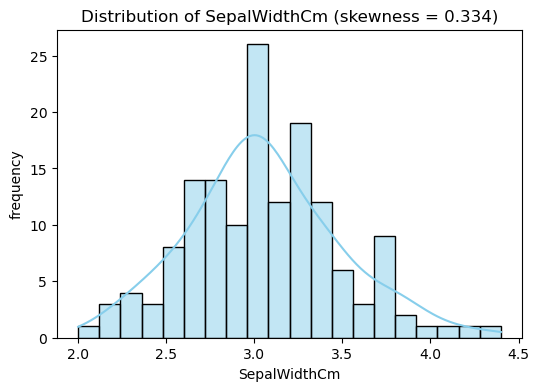

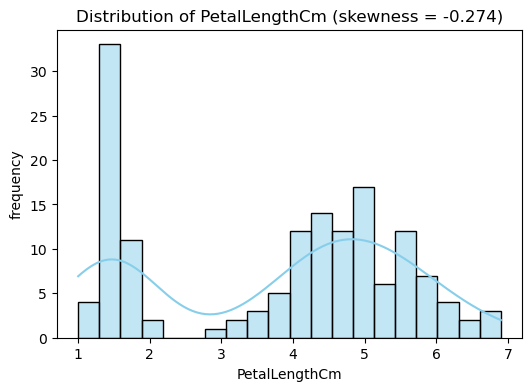

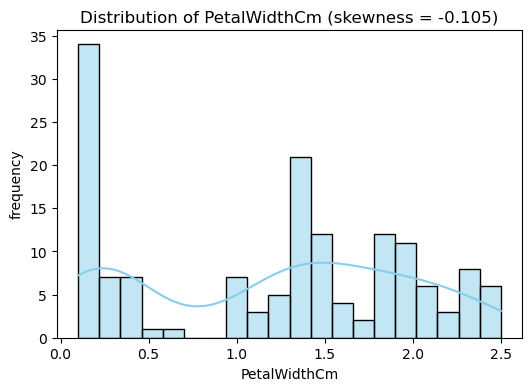

In [68]:
import seaborn as sns 
import matplotlib.pyplot as plt 
numeric_cols=df.select_dtypes(include=['Float64','int64']).drop("Id",axis=1)
for col in numeric_cols.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20,color="skyblue")
    plt.title(f"Distribution of {col} (skewness = {df[col].skew():.3f})")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

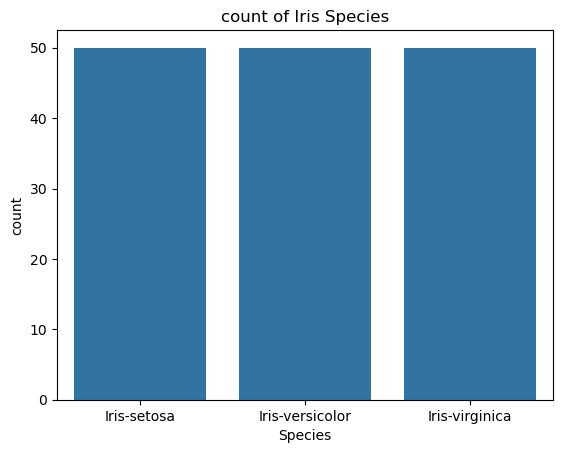

In [69]:
sns.countplot(x="Species",data=df)
plt.title("count of Iris Species")
plt.show()

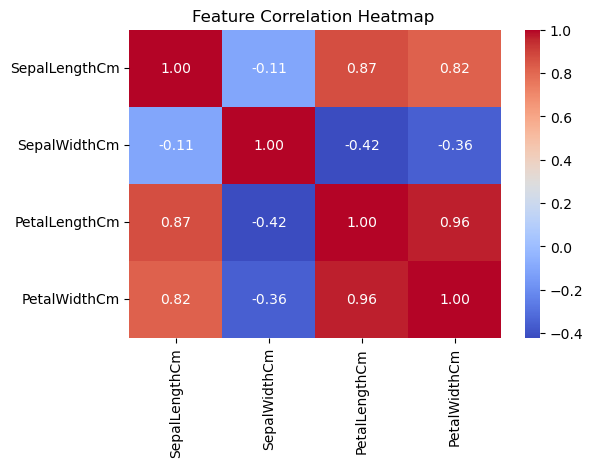

In [70]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop("Id", axis=1)


plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap ")
plt.show()

In [71]:
unique_species=df["Species"].unique()
print(unique_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = df.drop("Id", axis=1)

X = df.drop("Species", axis=1)
y = df["Species"]

encoder = LabelEncoder()
y = encoder.fit_transform(y)   



In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:

model = Sequential()

model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))


model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=3, activation='softmax'))


c:\Users\yuvas\.anaconda5\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [78]:

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=5,
                    validation_split=0.2,
                    verbose=1)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

print("First 10 Predictions:", pred_classes[:10])
print("Actual:", y_test[:10])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4271 - loss: 1.1610 - val_accuracy: 0.4167 - val_loss: 1.1251
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4583 - loss: 1.0861 - val_accuracy: 0.3333 - val_loss: 1.0662
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 1.0286 - val_accuracy: 0.3333 - val_loss: 1.0130
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 0.9707 - val_accuracy: 0.3333 - val_loss: 0.9565
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4479 - loss: 0.9113 - val_accuracy: 0.4583 - val_loss: 0.8907
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 0.8475 - val_accuracy: 0.5000 - val_loss: 0.8416
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.7946 - val_accuracy: 0.6667 - val_loss: 0.7970
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.7502 - val_accuracy: 0.6667 - val_loss:

In [80]:
import joblib
model.save("iris_ann.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']